In [112]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

TEST_SPLIT_SIZE = .3
RANDOM_STATE = 2055  # Parties in the sky

In [113]:
tf.keras.utils.set_random_seed(RANDOM_STATE)

In [114]:
def get_data(encode_y=False):
    vehicle_data = np.genfromtxt("./datos.csv", delimiter=",")

    x = vehicle_data[:, 0:-1]

    y = vehicle_data[:, -1]
    y = y.astype(np.uint8)
    y = y - 1  # Map target values from 0-4 instead of 1-5. Not really needed but really convenient for the dispersion matrix

    if encode_y:
        label_binarizer = LabelBinarizer()
        label_binarizer.fit(range(max(y) + 1))
        y = label_binarizer.transform(y)

    # x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=RANDOM_STATE, shuffle=False,
    # test_size = TEST_SPLIT_SIZE) 
    x_train, x_test, y_train, y_test = x[:7], x[7:], y[:7], y[7:]
    return x_train, x_test, y_train, y_test

In [115]:
def get_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=4]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    return model


In [116]:
def plot_losses(history, title):
    last_epoch_loss = history.history['loss'][-1]
    last_epoch_val_loss = history.history['val_loss'][-1]

    figure = plt.figure(figsize=(10, 8))

    axes = figure.add_subplot(1, 1, 1)

    axes.plot(history.history['loss'], color="#003B80", linestyle="dotted",
              label=f"loss entrenamiento {last_epoch_loss:.2f}")
    axes.plot(history.history['val_loss'], color="#003B80", label=f"loss validación {last_epoch_val_loss:.2f}")

    axes.set_xlabel('Época', color="#003B80", fontsize=14)
    axes.set_ylabel('Pérdidas', color="#003B80", fontsize=14)

    axes.set_title(title, fontsize=18)
    axes.set_facecolor('#F0F7FF')
    axes.legend(loc="best")
    axes.grid(visible=True, which='major', axis='both', color="#FFFFFF", linewidth=2)
    axes.set_axisbelow(True)
    # axes.set_ylim(ymin=0, ymax=1.1)
    # axes.yaxis.set_major_locator(MultipleLocator(0.1))

    return figure


# Training with categorical crossentropy

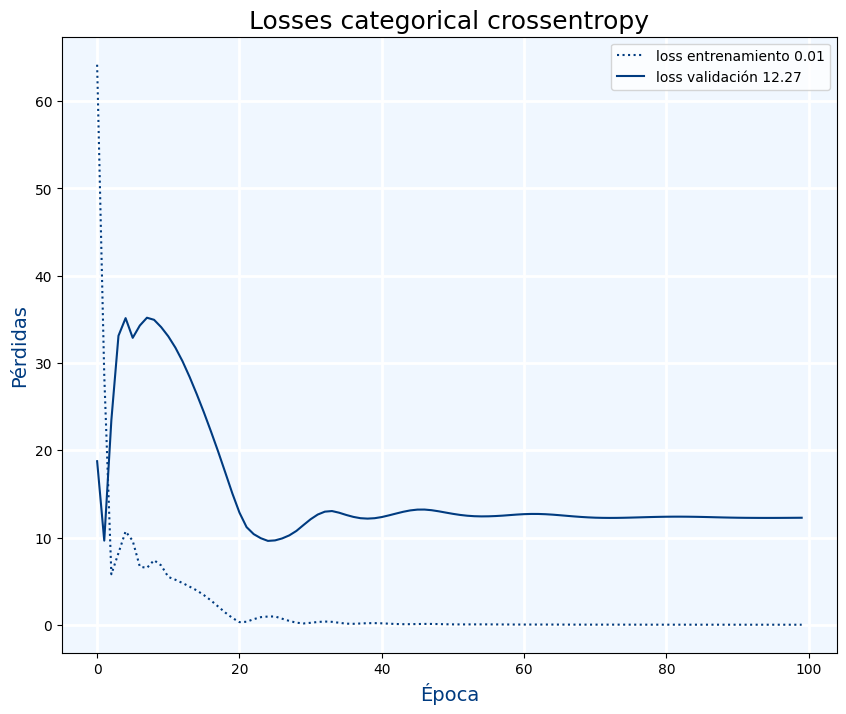

In [117]:
X_train, X_test, y_train, y_test = get_data(encode_y=True)
model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=False)
_ = plot_losses(history, "Losses categorical crossentropy")

# Training with sparse categorical crossentropy

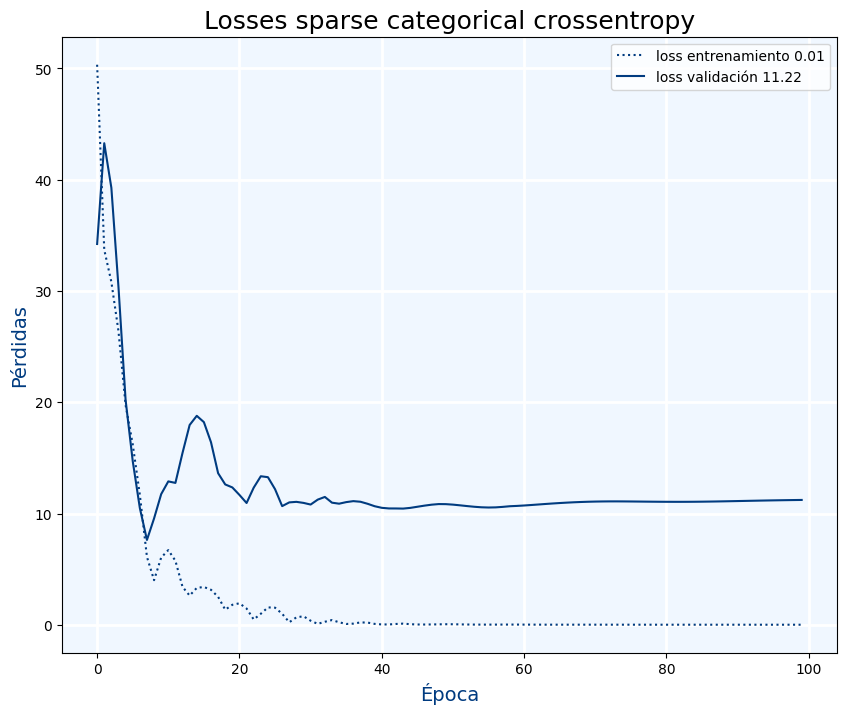

In [118]:
X_train_sparse, X_test_sparse, y_train_sparse, y_test_sparse = get_data()
model_sparse = get_model()
model_sparse.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sparse = model_sparse.fit(X_train_sparse, y_train_sparse, epochs=100, batch_size=32,
                                  validation_data=(X_test_sparse, y_test_sparse), verbose=False)
_ = plot_losses(history_sparse, "Losses sparse categorical crossentropy")

In [119]:
y_train_sparse

array([2, 3, 1, 0, 1, 3, 0], dtype=uint8)

In [120]:
y_train

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0]])